In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

самый популярный набором данных в области машинного обучения, набором данных iris изUC Irvine Хранилище машинного обучения

In [16]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

В следующем разделе мы попытаемся создать классификатор дерева решений, чтобы определить тип цветка с учетом его размеров.

In [17]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Хотя деревья решений могут обрабатывать категориальные данные, мы все равно кодируем цели в терминах цифр (т.е. setosa = 0, versicolor = 1, virginica = 2), чтобы создать путаницу в более поздней точке. К счастью,pandasБиблиотека предоставляет метод для этой цели.

In [24]:
y = pd.get_dummies(y)

Мы хотим оценить производительность нашей модели. Поэтому мы откладываем четверть данных для тестирования.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Далее мы создаем и обучаем экземпляр DecisionTreeClassifer учебный класс. Мы предоставляем значения y, потому что наша модель использует контролируемый алгоритм машинного обучения.

In [20]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Мы можем просмотреть фактическое дерево решений, созданное нашей моделью, запустив следующий блок кода.

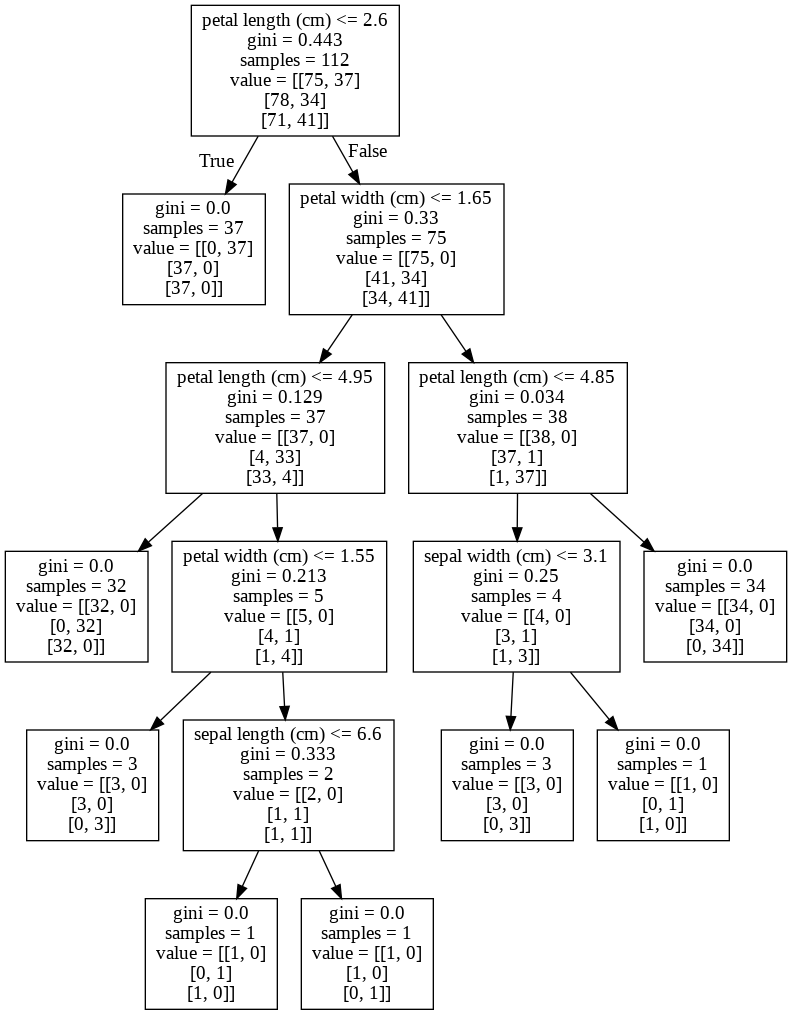

In [21]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Давайте посмотрим, как работает наше дерево решений, когда оно представлено тестовыми данными.

In [22]:
y_pred = dt.predict(X_test)

In [23]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])